In [1]:
# from huggingface_hub import model_info

# LoRA weights ~3 MB
# model_path = "/home/image_gen/model_op/checkpoint-8000"

# info = model_info(model_path)
# model_base = info.cardData["base_model"]
# print(model_base)   # CompVis/stable-diffusion-v1-4


In [1]:
model_base = "runwayml/stable-diffusion-v1-5"

In [2]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

/root/miniconda3/envs/image/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
pipe = StableDiffusionPipeline.from_pretrained(model_base, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

Loading pipeline components...:  57%|█████▋    | 4/7 [00:03<00:03,  1.10s/it]/root/miniconda3/envs/image/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Loading pipeline components...: 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]


In [4]:
model_path = "/home/image_gen/model_op/checkpoint-9000"
pipe.unet.load_attn_procs(model_path)

In [5]:
pipe.to("cuda")

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.30.3",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "DPMSolverMultistepScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [18]:
img_gen_prompt = """
normal distribution.
"""

In [19]:
print(img_gen_prompt)


normal distribution.



In [22]:
image = pipe(img_gen_prompt, num_inference_steps=100).images[0]
image.save("samp_output2.png")

  1%|          | 1/100 [00:00<00:16,  5.96it/s]

100%|██████████| 100/100 [00:16<00:00,  6.12it/s]


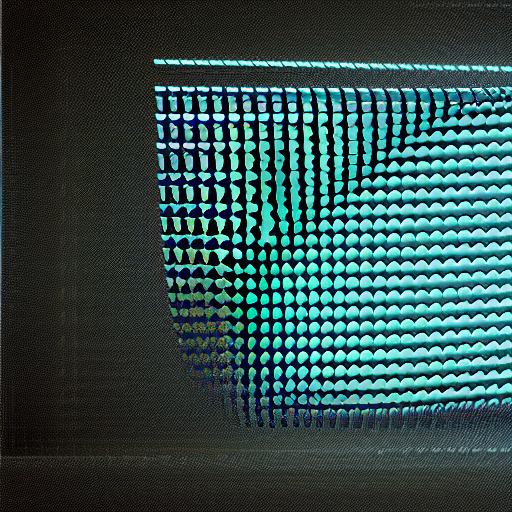

In [23]:
image